# Analyzing Covid Total Cases per 150 Randomly Sampled Countries (Linear Regression vs. Decision Trees vs. Random Forest)

### Utilize Scikit-Learn, Matplotlib, Pandas, NumPy

In [1]:
import pandas as pd

covids = pd.read_csv('/Users/faris/Downloads/COVID-19 Coronavirus.csv.xls',header=None)
covids.rename(columns={0:'Country', 
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'},inplace=True)
covids = covids.drop([0])
covids = covids.dropna(axis=0, how='any')
covids[['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop', 'Death percentage']] = covids[['Population','Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop', 'Death percentage']].apply(pd.to_numeric)
covids

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
222,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
223,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
224,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

covid = covids.sample(n=150)
X, y = covid[['Population', 'Total Deaths', 'Death percentage']].values, covid['Total Cases'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 127 rows
Test Set: 23 rows


MSE: 15691178097573.443
RMSE: 3961209.1711462857
R2: 0.5565336870230937


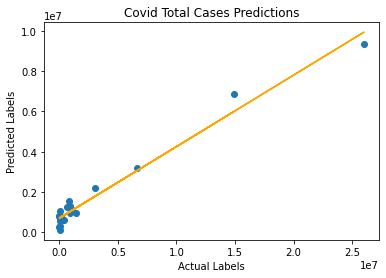

In [3]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: " + str(mse))
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))
r2 = r2_score(y_test, predictions)
print("R2: " + str(r2))

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Covid Total Cases Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='Orange')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)

tree = export_text(model)
print(tree)

|--- feature_1 <= 101295.50
|   |--- feature_1 <= 16530.00
|   |   |--- feature_1 <= 6035.00
|   |   |   |--- feature_1 <= 1251.00
|   |   |   |   |--- feature_1 <= 667.50
|   |   |   |   |   |--- feature_1 <= 93.50
|   |   |   |   |   |   |--- feature_1 <= 78.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.05
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 67363.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 10624.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  10624.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [2118.00]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  67363.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 390981.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  390981.00
|   |   |   |   |   |   |   

MSE: 6318824819324.782
RMSE: 2513727.2762423498
R2: 0.8214164718832507


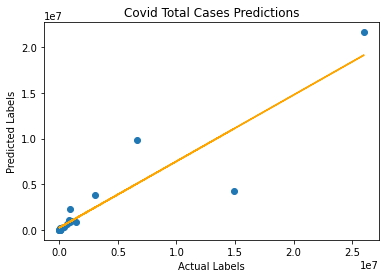

In [5]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: " + str(mse))
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))
r2 = r2_score(y_test, predictions)
print("R2: " + str(r2))

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Covid Total Cases Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='Orange')
plt.show()

MSE: 5513957635880.372
RMSE: 2348181.7723252117
R2: 0.844163742996909


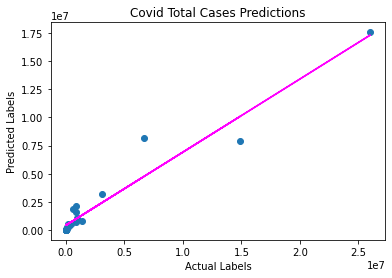

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: " + str(mse))
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))
r2 = r2_score(y_test, predictions)
print("R2: " + str(r2))

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Covid Total Cases Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 3444731674413.226
RMSE: 1855998.8347014731
R2: 0.902644502194323


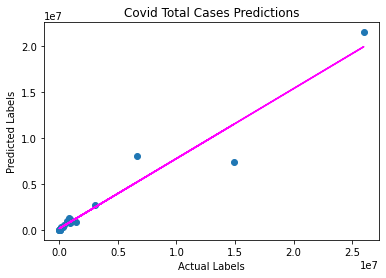

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: " + str(mse))
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))
r2 = r2_score(y_test, predictions)
print("R2: " + str(r2))

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Covid Total Cases Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()